### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

Errore RMSE: 44.45


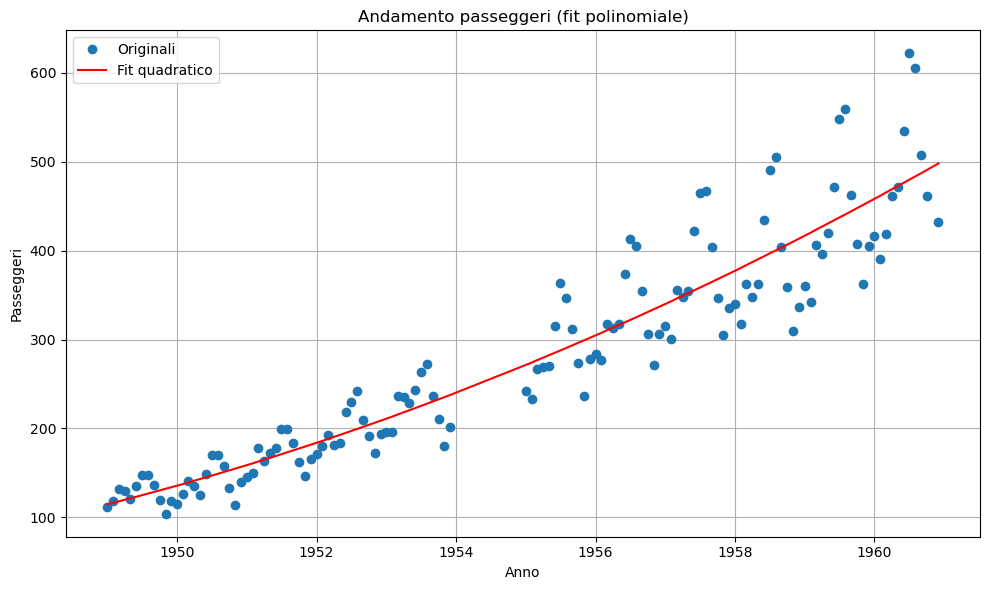

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dati = pd.read_csv('dati/data.csv')

dati['date'] = pd.to_datetime(dati['date'], format='%Y-%m')
inizio = pd.to_datetime('1949-01')
dati['mese'] = (dati['date'].dt.year - inizio.year) * 12 + (dati['date'].dt.month - 1)

dati.dropna(subset=['mese', 'passengers'], inplace=True)

x = dati['mese'].values
y = dati['passengers'].values


fit = np.poly1d(np.polyfit(x, y, 2)) #grado 2
y_fit = fit(x)

errore = np.sqrt(np.mean((y - y_fit) ** 2))
print(f"Errore RMSE: {errore:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(dati['date'], y, "o", label='Originali')
plt.plot(dati['date'], y_fit, "-", color='red', label='Fit quadratico')
plt.title("Andamento passeggeri (fit polinomiale)")
plt.xlabel("Anno")
plt.ylabel("Passeggeri")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [8]:
import dash
from dash import dcc, html, Input, Output
import numpy as np
import plotly.graph_objs as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# y = x³ - x + rumore 
np.random.seed(42)
x_vals = np.linspace(-3, 3, 100)
noise = np.random.normal(loc=0, scale=3, size=x_vals.shape)
y_vals = x_vals**3 - x_vals + noise

app = dash.Dash(__name__)

# grafica
app.layout = html.Div([
    html.H1("Modello di Regressione Polinomiale", style={"textAlign": "center"}),
    
    html.Label("Scegli il grado del polinomio:", style={"marginTop": "20px"}),
    dcc.Slider(
        id='slider-grado',
        min=1,
        max=10,
        step=1,
        value=3,
        marks={i: f"{i}" for i in range(1, 11)},
        tooltip={"placement": "bottom", "always_visible": True}
    ),
    
    dcc.Graph(id='grafico-regressione')
])

@app.callback(
    Output('grafico-regressione', 'figure'),
    Input('slider-grado', 'value')
)
def aggiorna_figura(grado):
    x_input = x_vals.reshape(-1, 1)
    poly = PolynomialFeatures(degree=grado)
    x_poly = poly.fit_transform(x_input)
    
    model = LinearRegression().fit(x_poly, y_vals)
    y_fit = model.predict(x_poly)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='markers', name='Dati Osservati'))
    fig.add_trace(go.Scatter(x=x_vals, y=y_fit, mode='lines', name=f'Polinomio grado {grado}'))
    
    fig.update_layout(
        title=f"Approssimazione Polinomiale (grado {grado})",
        xaxis_title="X",
        yaxis_title="Y",
        template="plotly_white"
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
